C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


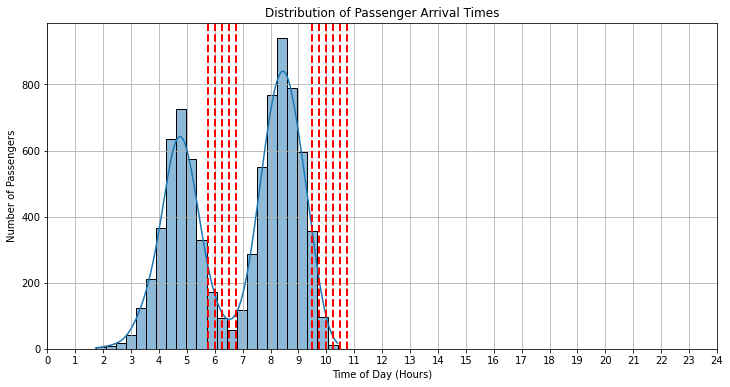

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of filenames to read
filenames = [
    'passengers_0.csv',
    'passengers_1.csv',
    'passengers_2.csv',
    'passengers_3.csv',
    'passengers_4.csv'
]

# Initialize an empty list to store the DataFrames
dataframes_list = []

# Loop over the filenames
for filename in filenames:
    # Read each file and append to the list
    dataframes_list.append(pd.read_csv(filename))

# Concatenate all the DataFrames into one
passenger_data = pd.concat(dataframes_list, ignore_index=True)

# Now you can work with the combined_data DataFrame

# Convert the Unixtime (seconds after midnight) to hours for easier interpretation
passenger_data['ArrivalTime'] = passenger_data['ArrivalTime'] / 3600




flights_data = pd.read_csv('flights.csv')
flights_data['DepartureTime'] = flights_data['DepartureTime'] / 3600
security_data = pd.read_csv('security.csv')
security_data['Time'] = security_data['Time'] / 3600

# Plotting the distribution of arrival times
plt.figure(figsize=(12, 6))
sns.histplot(passenger_data['ArrivalTime'], bins=24, kde=True)
plt.title('Distribution of Passenger Arrival Times')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Number of Passengers')
plt.xticks(range(0, 25))
plt.grid(True)


# Adding red vertical lines for departure times
for departure_time in flights_data["DepartureTime"]:
    plt.axvline(departure_time, color='red', linestyle='--', linewidth=2)
    
plt.show()

In [2]:
flights_data["DepartureTime"]

0      5.75
1      6.00
2      6.25
3      6.50
4      6.75
5      9.50
6      9.75
7     10.00
8     10.25
9     10.50
10    10.75
Name: DepartureTime, dtype: float64

In [3]:
new_data = pd.merge(passenger_data, flights_data[['FlightNumber', 'DepartureTime']], on='FlightNumber', how='left')
new_data["SecurityTime"] = (4 * passenger_data['ArrivalTime']).astype(int) / 4
new_data = pd.merge(new_data, security_data, left_on='SecurityTime', right_on='Time', how='left')
new_data = new_data[['Id','ArrivalTime','SecurityTime','Lanes','DepartureTime','FlightNumber']]

In [4]:
new_data

,Id,ArrivalTime,SecurityTime,Lanes,DepartureTime,FlightNumber
0,Q0Y1O6CR1SKHJ8CGTWM4,5.118291,5.00,2,5.75,BM2616
1,0RMHO3KWDA14LHGQJ68Q,4.071072,4.00,2,5.75,BM2616
2,KPO6X27GTDW7XLZE6HZU,3.532695,3.50,1,5.75,BM2616
3,V030CS9ENFWREU3596XM,3.873509,3.75,1,5.75,BM2616
4,Y8MOM7XGDP5B80QV659L,4.627173,4.50,2,5.75,BM2616
...,...,...,...,...,...,...
7860,CDXAYX1QEJJME327NIP5,7.839305,7.75,2,10.75,IG2596
7861,XKFD5HW35JCFWT2GY0VP,9.472646,9.25,2,10.75,IG2596
7862,9VO6ZTG0MF953X8WCQOH,9.041384,9.00,2,10.75,IG2596
7863,RUHKC9B30692XP0H5IPG,9.482527,9.25,2,10.75,IG2596
